In [1]:

sales=pd.read_csv('C:\\documents\\study material\\data science\\supply chain\\Udemy - RA Data Science and Supply Chain analytics. A-Z with Python 2020-9\\7. Working with dates in Python\\12.1 twentyeleven.csv',parse_dates=True)

sales.head()

<IPython.core.display.Javascript object>

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [2]:
sales.describe()

,Invoice,Quantity,Price,Customer ID,revenue,year
count,484329.000000,484330.000000,484330.000000,367058.000000,484330.000000,484330.0
mean,561803.767295,10.525988,3.840852,15271.566801,19.769626,2011.0
std,12304.347788,43.003959,31.532260,1710.331691,91.136800,0.0
min,539993.000000,1.000000,0.000000,12347.000000,0.000000,2011.0
25%,550989.000000,1.000000,1.250000,13924.000000,3.900000,2011.0
50%,562540.000000,4.000000,2.080000,15116.000000,9.950000,2011.0
75%,572650.000000,12.000000,4.130000,16771.000000,17.700000,2011.0
max,581587.000000,12540.000000,11062.060000,18287.000000,38970.000000,2011.0


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 40.6+ MB


In [7]:
sales['InvoiceDate']=pd.to_datetime(sales['InvoiceDate'])
sales['date']=pd.to_datetime(sales['date'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Invoice      484329 non-null  float64            
 1   StockCode    484330 non-null  object             
 2   Description  484330 non-null  object             
 3   Quantity     484330 non-null  int64              
 4   InvoiceDate  484330 non-null  datetime64[ns, UTC]
 5   Price        484330 non-null  float64            
 6   Customer ID  367058 non-null  float64            
 7   Country      484330 non-null  object             
 8   date         484330 non-null  datetime64[ns]     
 9   revenue      484330 non-null  float64            
 10  year         484330 non-null  int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 40.6+ MB


In [12]:
sales=sales.drop_duplicates()

In [15]:
sales=sales.drop('Customer ID',axis=1)

In [16]:
sales=sales.dropna()

In [18]:
sales['Revenue']=sales['Quantity']*sales['Price']

In [26]:
des_grouped=sales.groupby(['Description']).agg(total_sales=('Quantity',np.sum),
                                              total_revenue=('Revenue',np.sum)).reset_index()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
des_grouped.head()

,Description,total_sales,total_revenue
0,10 COLOUR SPACEBOY PEN,5981,5060.18
1,12 COLOURED PARTY BALLOONS,2072,1357.58
2,12 DAISY PEGS IN WOOD BOX,332,569.40
3,12 EGG HOUSE PAINTED WOOD,138,2123.61
4,12 HANGING EGGS HAND PAINTED,40,83.20


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='total_sales', ylabel='total_revenue'>

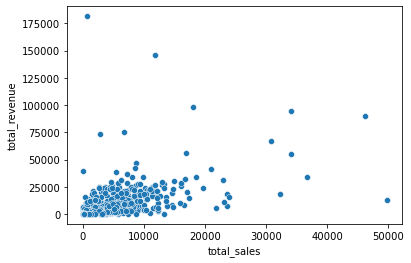

In [28]:
sns.scatterplot(data=des_grouped,x='total_sales',y='total_revenue')

In [35]:
date_grouped=sales.groupby(['date']).agg(total_sales=('Quantity',np.sum),
                                              total_revenue=('Revenue',np.sum))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1440x1440 with 0 Axes>

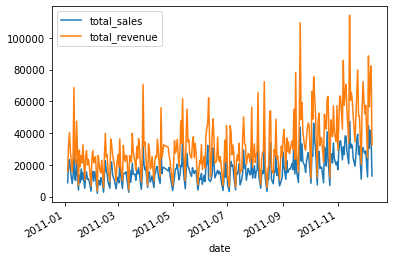

In [41]:
plt.figure(figsize=(20,20))
date_grouped.plot();

In [38]:
date_grouped.head()

,total_sales,total_revenue
date,,
2011-01-04,8630,16005.73
2011-01-05,19769,32630.27
2011-01-06,23174,40366.45
2011-01-07,17160,28836.59
2011-01-09,8125,15590.68


In [46]:
import inventorize as inv

In [49]:
segregated=inv.ABC(des_grouped[['Description','total_sales']])

In [50]:
segregated

,Description,total_sales,Percentage,comulative,Category
3837,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49756,9.759808e-03,0.009760,A
1758,JUMBO BAG RED RETROSPOT,46223,9.066798e-03,0.018827,A
2603,POPCORN HOLDER,36749,7.208441e-03,0.026035,A
3747,WHITE HANGING HEART T-LIGHT HOLDER,34005,6.670196e-03,0.032705,A
214,ASSORTED COLOUR BIRD ORNAMENT,33999,6.669019e-03,0.039374,A
...,...,...,...,...,...
1849,LARGE TAHITI BEACH BAG,1,1.961534e-07,0.999999,C
3762,WHITE SILVER NECKLACE SHELL GLASS,1,1.961534e-07,0.999999,C
279,BAROQUE BUTTERFLY EARRINGS RED,1,1.961534e-07,1.000000,C
277,BAROQUE BUTTERFLY EARRINGS MONTANA,1,1.961534e-07,1.000000,C


In [51]:
segregated.Category.value_counts()

C    2150
A     917
B     892
Name: Category, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Category', ylabel='count'>

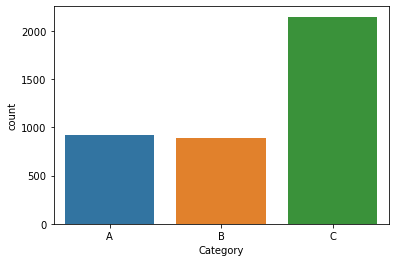

In [52]:
sns.countplot(x='Category',data=segregated)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Category', ylabel='total_sales'>

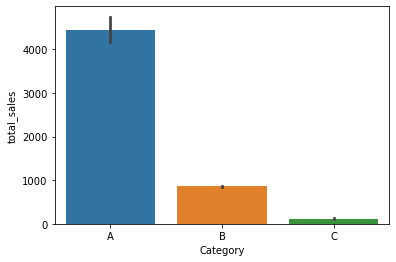

In [53]:
sns.barplot(x='Category',y='total_sales',data=segregated)